## Gráficas individuales por escenario

In [31]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from math import pi

# Diccionario de archivos y nombre del escenario
archivos = {
    "Escenario 7": "Es7_MejorResultado1Glaxomenortiempo.xlsx",
    "Escenario 8": "Es8_Mod1van.xlsx",
    "Escenario 9": "Esc9_CombinacionDA.xlsx",
    "Escenario 10": "Esc10_CombinacionDA_MejorResultado.xlsx"
}

# Columnas clave para el radar chart
columnas_radar = [
    'Espera_Promedio_min',
    'Espera_Maxima_min',
    'Uso_Capacidad_pct',
    'Costo_Promedio_USD',
    'Pct_Viajes_Llenos',
    'Pct_Cumple_Frecuencia'
]

# Colores personalizados
colores_barras = ['blue', 'skyblue']

# Loop para graficar cada escenario
for nombre_escenario, archivo in archivos.items():
    try:
        df = pd.read_excel(archivo, sheet_name="RESUMEN")
        estaciones = df["Estacion"]

        # 1. Tiempo de Espera
        fig1 = px.bar(df, x="Estacion", y=["Espera_Promedio_min", "Espera_Maxima_min"],
                      barmode='group', title=f"Tiempo de Espera - {nombre_escenario}",
                      text_auto=True, color_discrete_sequence=colores_barras)
        fig1.update_traces(textposition='outside')
        fig1.show()

        # 2. Uso de Unidades
        fig2 = px.bar(df, x="Estacion", y=["Uso_Capacidad_pct", "Pct_Viajes_Llenos"],
                      barmode='group', title=f"Uso de Unidades - {nombre_escenario}",
                      text_auto=True, color_discrete_sequence=colores_barras)
        fig2.update_traces(textposition='outside')
        fig2.show()

        # 3. Pastel de Viajes Llenos Promedio
        fig3 = px.pie(df, names="Estacion", values="Viajes_Llenos_Promedio",
                      title=f"Distribución de Viajes Llenos - {nombre_escenario}", hole=0.4)
        fig3.show()

        # 4. Costo promedio operativo
        fig4 = px.bar(df, y="Estacion", x="Costo_Promedio_USD", orientation='h',
                      title=f"Costo Promedio Operativo - {nombre_escenario}",
                      text_auto=True, color_discrete_sequence=["green"])
        fig4.update_traces(textposition='outside')
        fig4.show()

        # 6. Radar Chart
        df_radar = df.set_index("Estacion")[columnas_radar]
        df_radar_norm = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

        categorias = columnas_radar
        fig6 = go.Figure()
        for est in df_radar_norm.index:
            fig6.add_trace(go.Scatterpolar(
                r=df_radar_norm.loc[est].tolist() + [df_radar_norm.loc[est].tolist()[0]],
                theta=categorias + [categorias[0]],
                fill='toself',
                name=est
            ))
        fig6.update_layout(
            polar=dict(radialaxis=dict(visible=True)),
            title=f"Radar Chart - {nombre_escenario}",
            showlegend=True
        )
        fig6.show()

    except Exception as e:
        print(f"❌ Error en {nombre_escenario}: {e}")


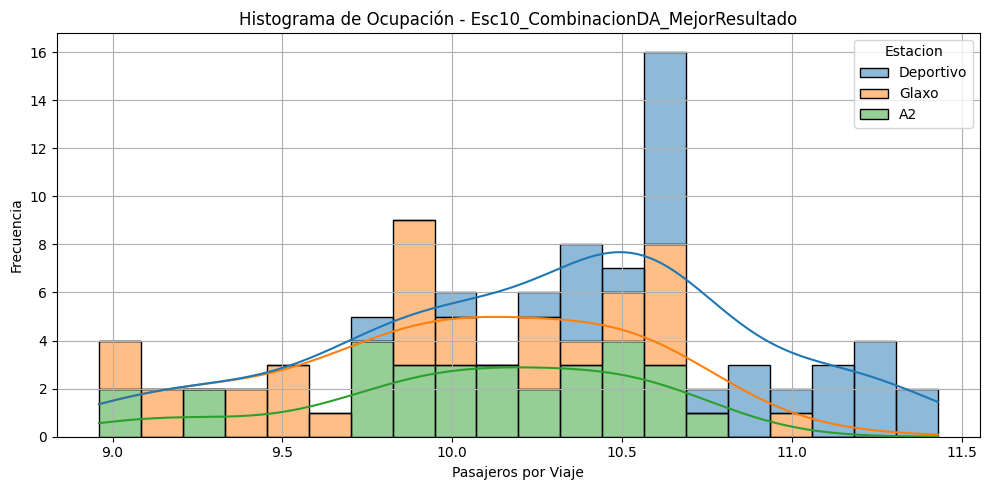

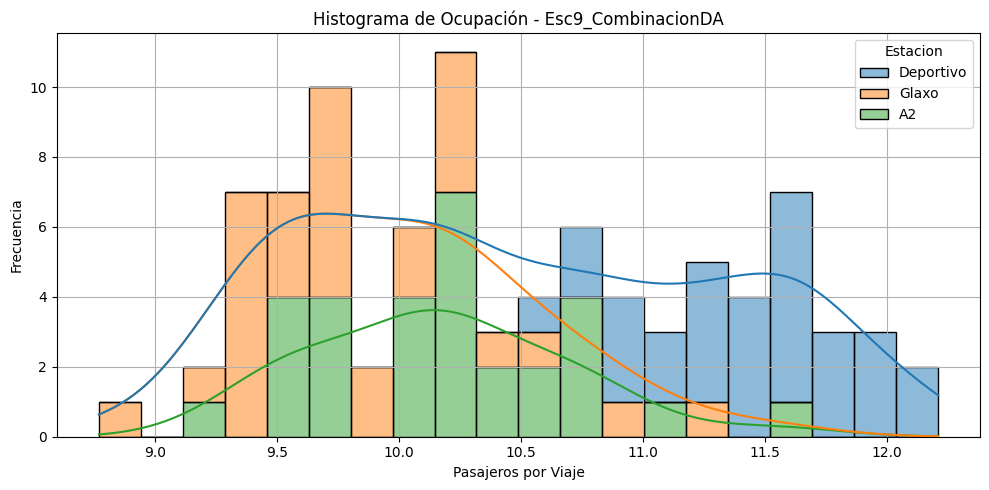

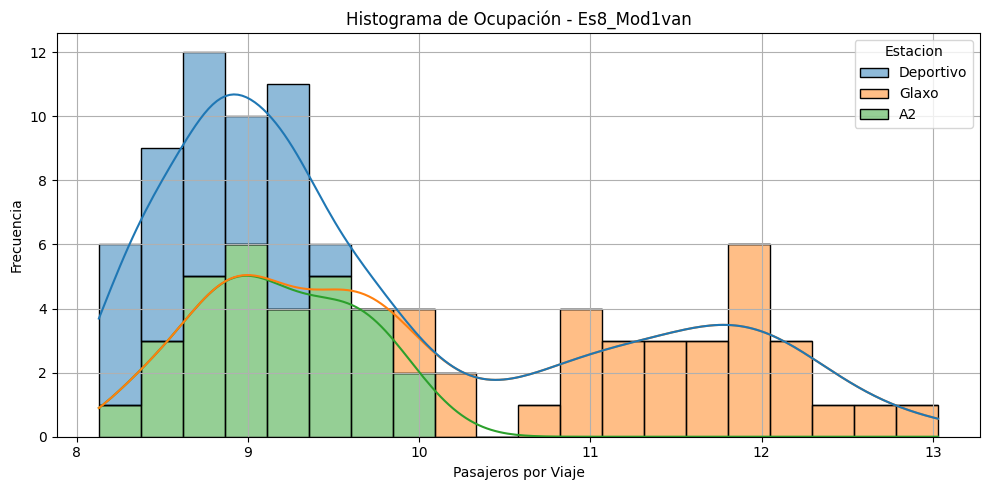

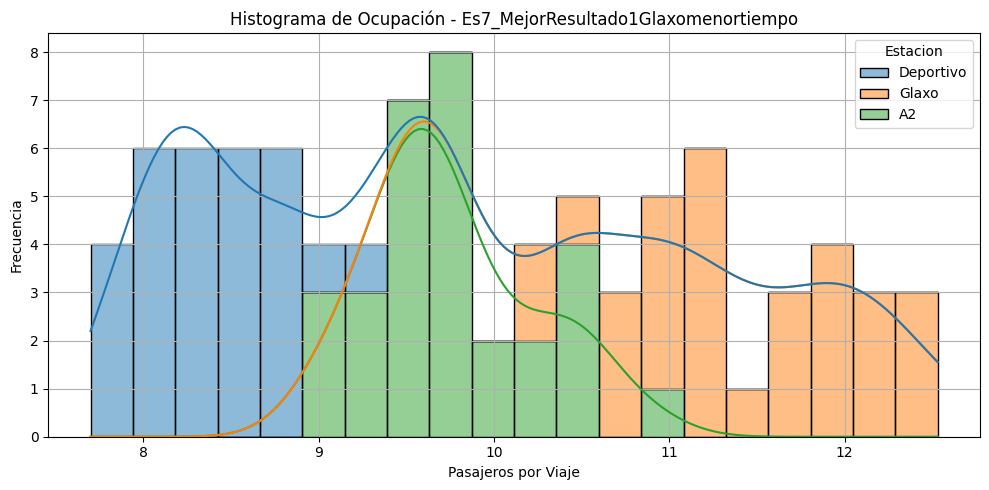

In [18]:

carpeta = "."  
archivos = [f for f in os.listdir(carpeta) if f.startswith("Es") and f.endswith(".xlsx")]

# ===============================
# CARGA de datos desde cada archivo
# ===============================
df_ocupacion_total = pd.DataFrame()

for archivo in archivos:
    ruta = os.path.join(carpeta, archivo)
    xls = pd.ExcelFile(ruta)

    hojas_sim = [h for h in xls.sheet_names if h != "RESUMEN"]

    for hoja in hojas_sim:
        df = pd.read_excel(xls, sheet_name=hoja)

        if "Pasajeros_Transportados_Promedio" in df.columns:
            df["Estacion"] = hoja.split("_")[0]
            df["Escenario"] = archivo.replace(".xlsx", "")
            df_ocupacion_total = pd.concat([df_ocupacion_total, df], ignore_index=True)

# ===============================
# HISTOGRAMAS por ESCENARIO
# ===============================
escenarios_unicos = df_ocupacion_total["Escenario"].unique()

for escenario in escenarios_unicos:
    df_esc = df_ocupacion_total[df_ocupacion_total["Escenario"] == escenario]
    
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_esc, x="Pasajeros_Transportados_Promedio", hue="Estacion",
                 bins=20, kde=True, multiple="stack")
    plt.title(f"Histograma de Ocupación - {escenario}")
    plt.xlabel("Pasajeros por Viaje")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Graficas DE los 4 ecenarios


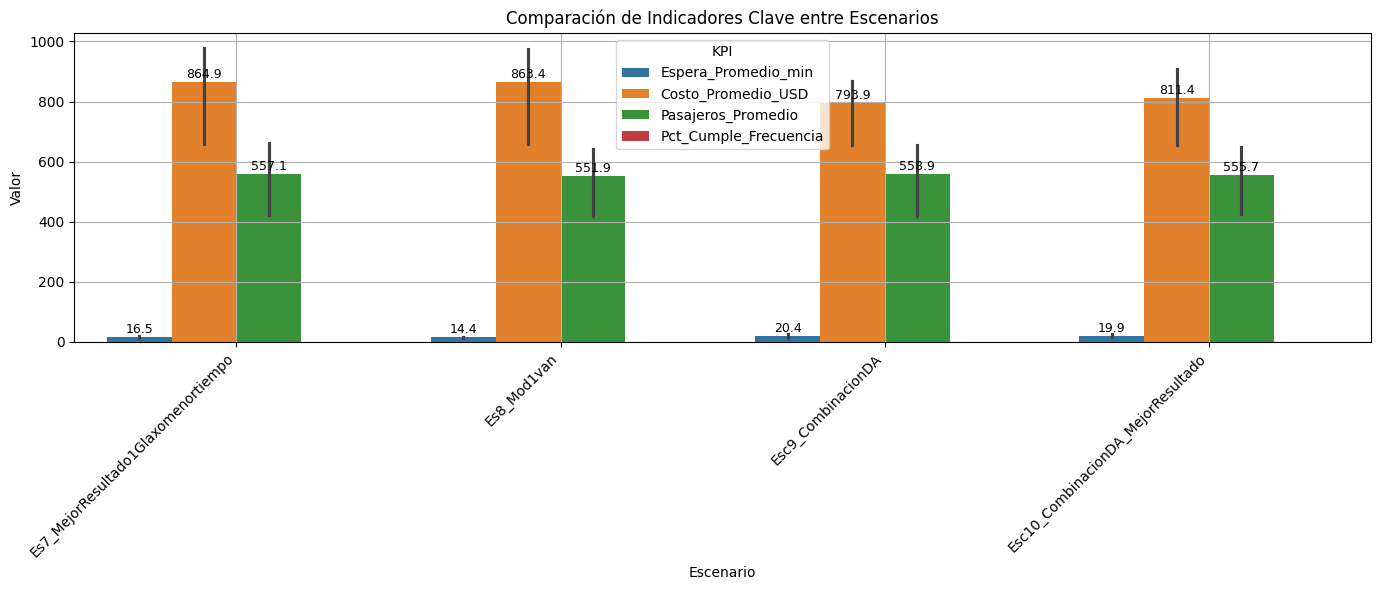

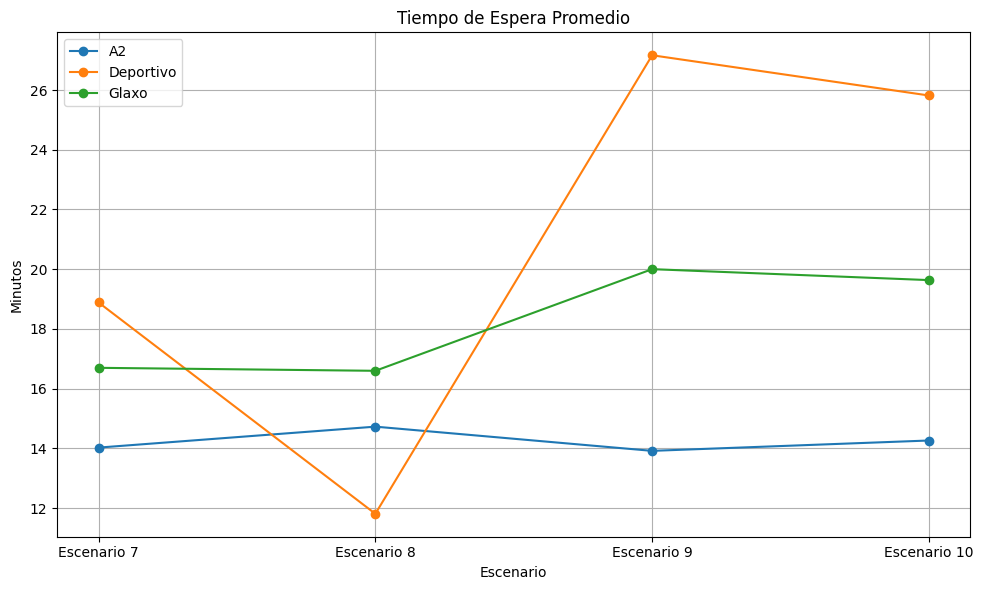

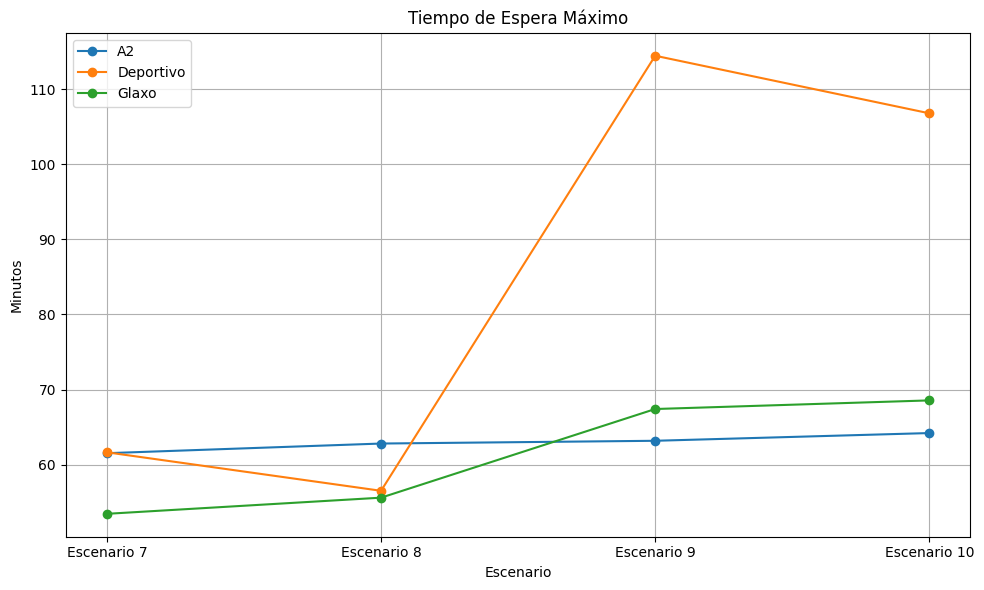

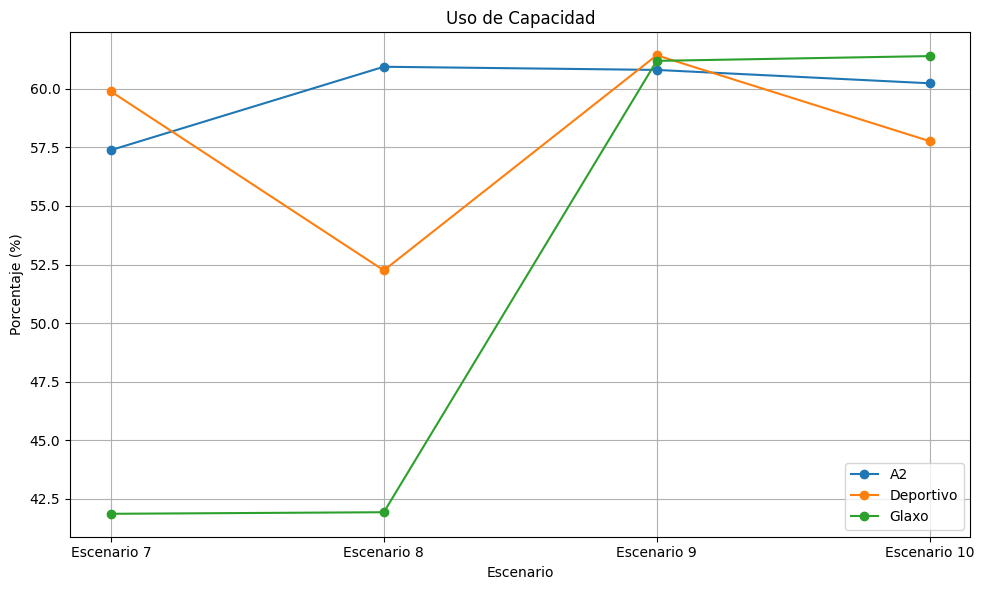

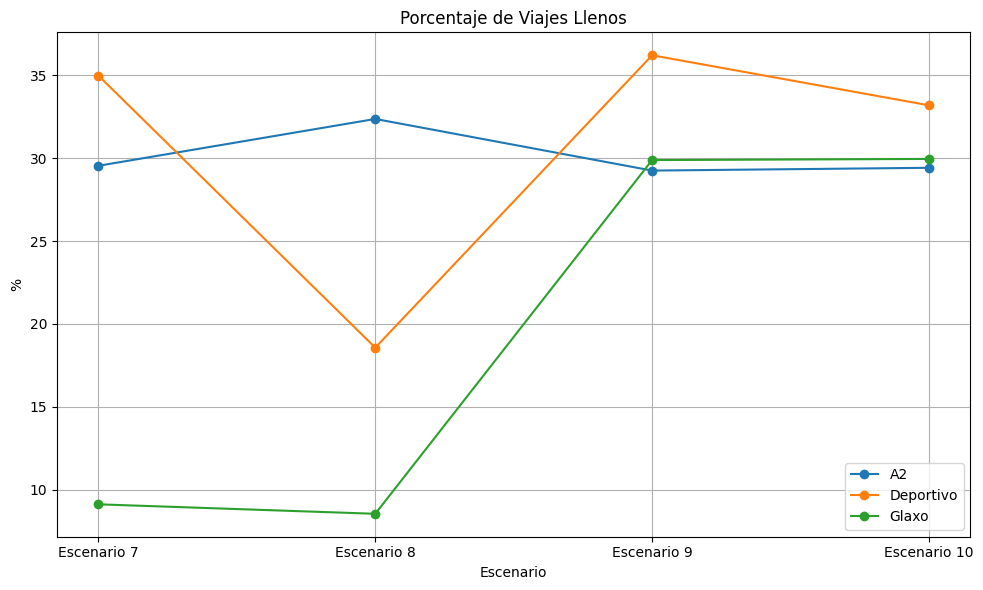

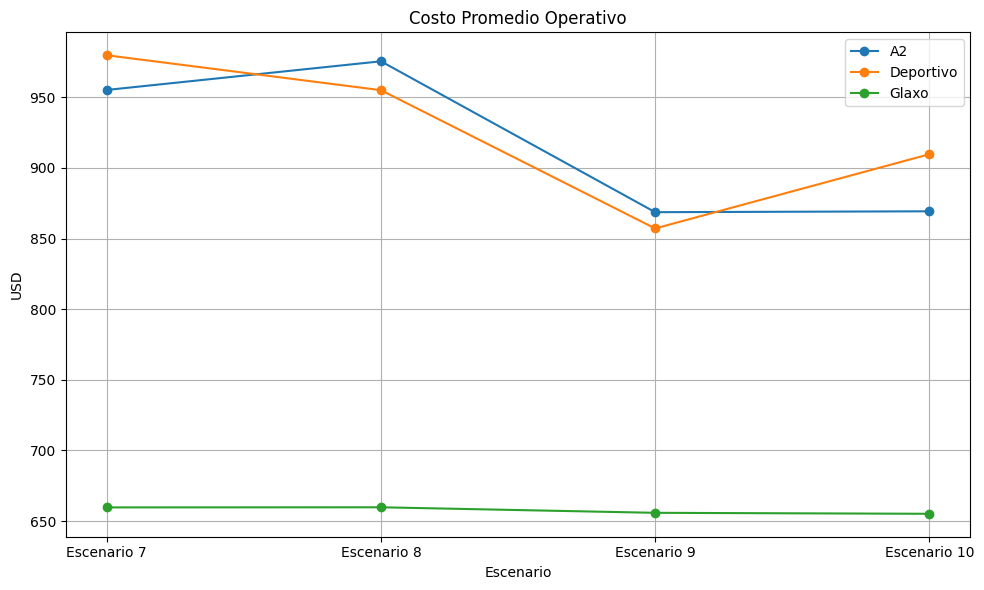

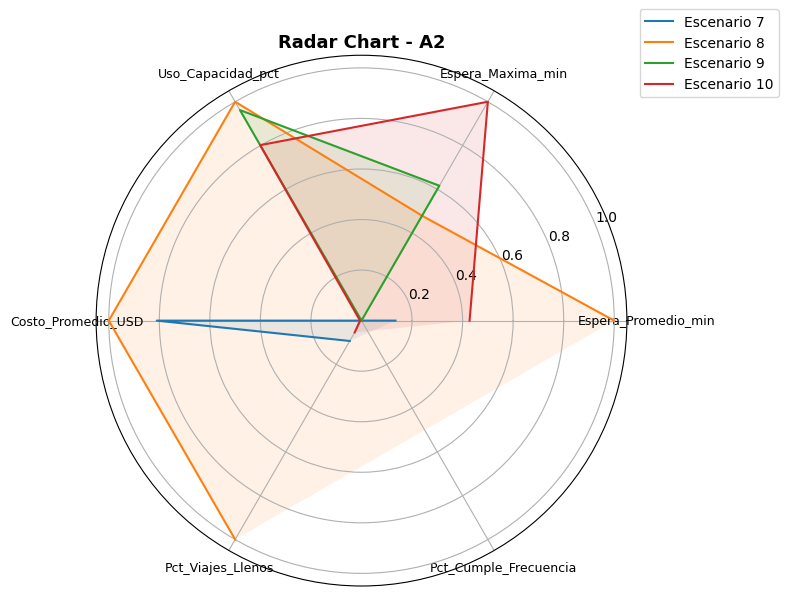

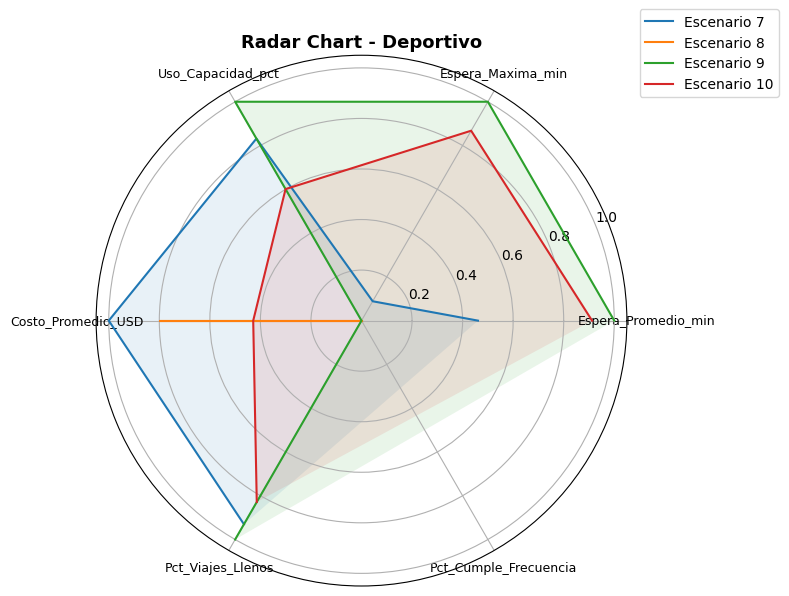

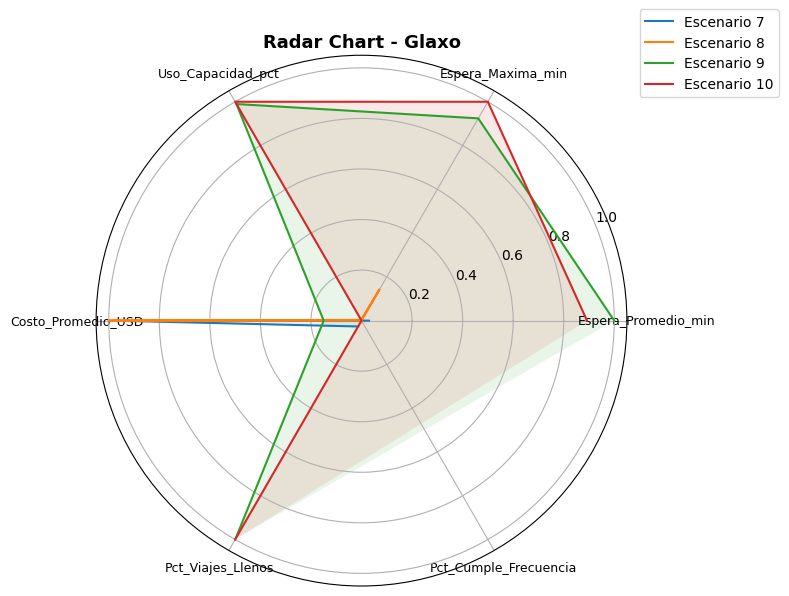

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import os

# Cargar el archivo de resumen (ajusta la ruta si es necesario)
archivo = "Resumen_Todos_Escenarios.xlsx"
df = pd.read_excel(archivo)

# KPIs que se van a graficar
kpis = ['Espera_Promedio_min', 'Costo_Promedio_USD', 'Pasajeros_Promedio', 'Pct_Cumple_Frecuencia']

# Reorganizar para formato largo (long format)
df_kpi = df.melt(id_vars=['Escenario', 'Estacion'], value_vars=kpis,
                 var_name='KPI', value_name='Valor')

# Crear figura
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_kpi, x='Escenario', y='Valor', hue='KPI')

# Mostrar los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height + 25),
                    ha='center', va='center', fontsize=9, color='black')

# Ajustes
plt.title("Comparación de Indicadores Clave entre Escenarios")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


# Archivos a comparar (deben estar en la misma carpeta)
archivos = {
    "Escenario 7": "Es7_MejorResultado1Glaxomenortiempo.xlsx",
    "Escenario 8": "Es8_Mod1van.xlsx",
    "Escenario 9": "Esc9_CombinacionDA.xlsx",
    "Escenario 10": "Esc10_CombinacionDA_MejorResultado.xlsx"
}

# Cargar hojas "RESUMEN"
datos = {}
for nombre, archivo in archivos.items():
    df = pd.read_excel(archivo, sheet_name="RESUMEN")
    df["Escenario"] = nombre
    datos[nombre] = df

# Unir todo en un solo DataFrame
df_total = pd.concat(datos.values(), ignore_index=True)

# Función para crear una gráfica de barras
def graficar_barras(variable, titulo, ylabel):
    plt.figure(figsize=(10, 6))
    for estacion in df_total['Estacion'].unique():
        subset = df_total[df_total['Estacion'] == estacion]
        plt.plot(subset['Escenario'], subset[variable], marker='o', label=estacion)
    plt.title(titulo)
    plt.xlabel("Escenario")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 1. Espera promedio
graficar_barras("Espera_Promedio_min", "Tiempo de Espera Promedio", "Minutos")

# 2. Espera máxima
graficar_barras("Espera_Maxima_min", "Tiempo de Espera Máximo", "Minutos")

# 3. Uso de capacidad
graficar_barras("Uso_Capacidad_pct", "Uso de Capacidad", "Porcentaje (%)")

# 4. Porcentaje de viajes llenos
graficar_barras("Pct_Viajes_Llenos", "Porcentaje de Viajes Llenos", "%")

# 5. Costo promedio
graficar_barras("Costo_Promedio_USD", "Costo Promedio Operativo", "USD")

# 6. Radar Chart por estación (solo para A2, Deportivo y Glaxo)
estaciones = df_total['Estacion'].unique()
metricas = [
    'Espera_Promedio_min',
    'Espera_Maxima_min',
    'Uso_Capacidad_pct',
    'Costo_Promedio_USD',
    'Pct_Viajes_Llenos',
    'Pct_Cumple_Frecuencia'
]

for estacion in estaciones:
    df_estacion = df_total[df_total['Estacion'] == estacion].set_index('Escenario')[metricas]
    df_norm = (df_estacion - df_estacion.min()) / (df_estacion.max() - df_estacion.min())
    angles = [n / float(len(metricas)) * 2 * pi for n in range(len(metricas))]
    angles += angles[:1]

    plt.figure(figsize=(8, 6))
    for esc in df_norm.index:
        values = df_norm.loc[esc].tolist()
        values += values[:1]
        plt.polar(angles, values, label=esc)
        plt.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], metricas, fontsize=9)
    plt.title(f"Radar Chart - {estacion}", fontsize=13, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


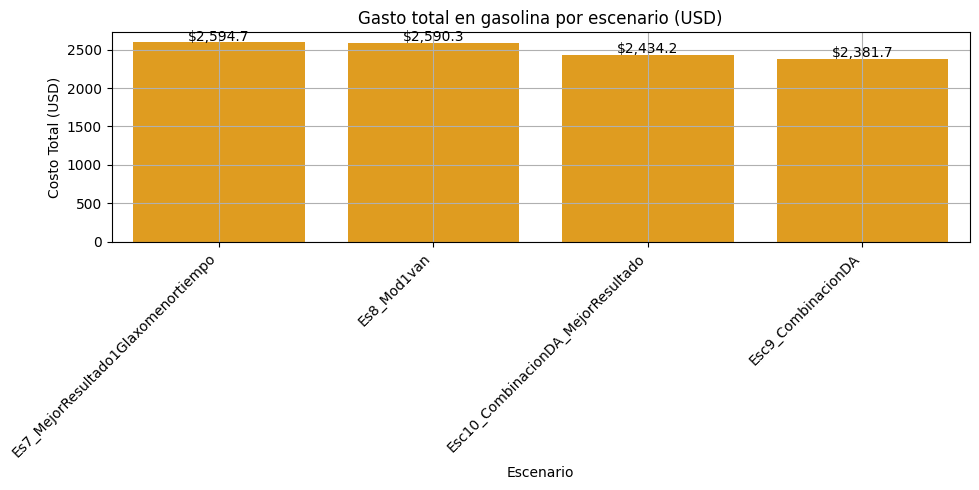

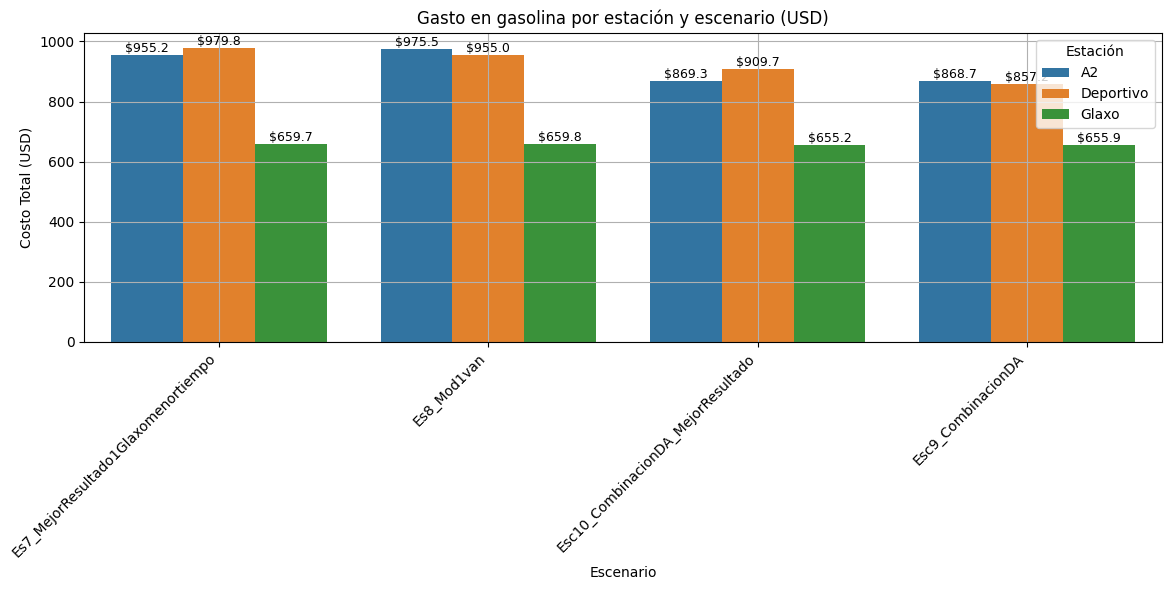

In [24]:

df = pd.read_excel("Resumen_Todos_Escenarios.xlsx")


df_gas_total = df.groupby("Escenario")["Costo_Promedio_USD"].sum().reset_index()

plt.figure(figsize=(10, 5))
ax1 = sns.barplot(data=df_gas_total, x="Escenario", y="Costo_Promedio_USD", color="orange")


for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f"${height:,.1f}", 
                 (p.get_x() + p.get_width() / 2., height + 20), 
                 ha='center', fontsize=10)

plt.title("Gasto total en gasolina por escenario (USD)")
plt.ylabel("Costo Total (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


df_gas_estacion = df.groupby(["Escenario", "Estacion"])["Costo_Promedio_USD"].sum().reset_index()

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=df_gas_estacion, x="Escenario", y="Costo_Promedio_USD", hue="Estacion")

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(f"${height:,.1f}", 
                     (p.get_x() + p.get_width() / 2., height + 10), 
                     ha='center', fontsize=9)

plt.title("Gasto en gasolina por estación y escenario (USD)")
plt.ylabel("Costo Total (USD)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Estación")
plt.grid(True)
plt.tight_layout()
plt.show()


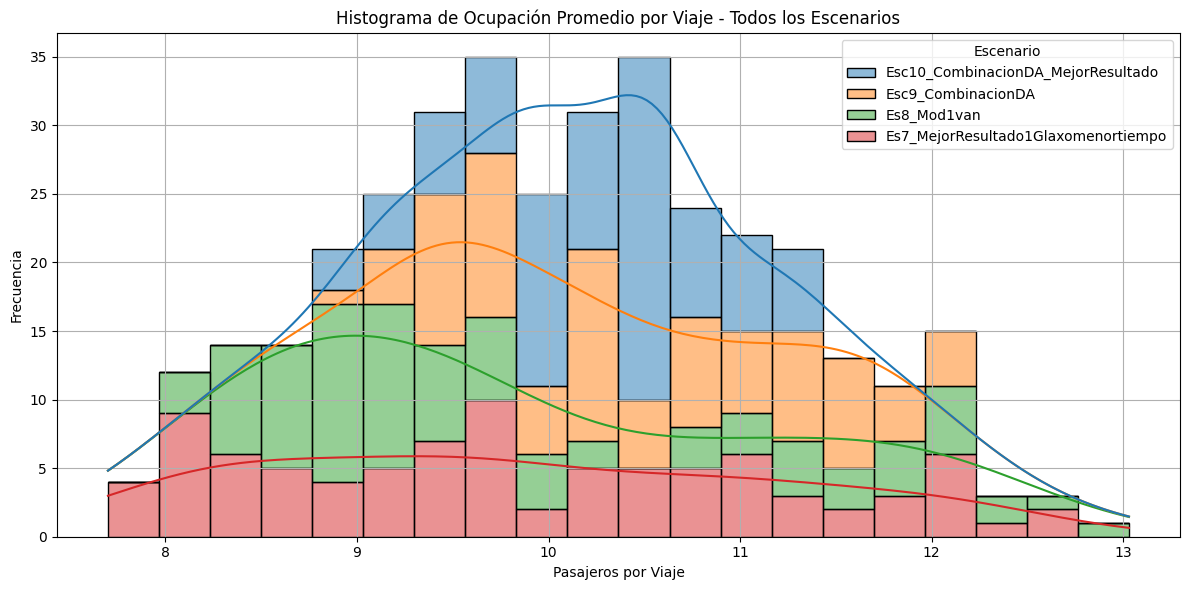

In [25]:
carpeta = "."  # Ruta local donde están los archivos .xlsx
archivos = [f for f in os.listdir(carpeta) if f.startswith("Es") and f.endswith(".xlsx")]
df_ocupacion_total = pd.DataFrame()

for archivo in archivos:
    ruta = os.path.join(carpeta, archivo)
    xls = pd.ExcelFile(ruta)

    # Todas las hojas menos RESUMEN
    hojas_sim = [h for h in xls.sheet_names if h != "RESUMEN"]

    for hoja in hojas_sim:
        df = pd.read_excel(xls, sheet_name=hoja)

        # Verificamos que la columna exista
        if "Pasajeros_Transportados_Promedio" in df.columns:
            df["Estacion"] = hoja.split("_")[0]
            df["Escenario"] = archivo.replace(".xlsx", "")
            df_ocupacion_total = pd.concat([df_ocupacion_total, df], ignore_index=True)

# ===============================
# Histograma de ocupación
# ===============================
plt.figure(figsize=(12, 6))
sns.histplot(data=df_ocupacion_total, 
             x="Pasajeros_Transportados_Promedio", 
             hue="Escenario", 
             bins=20, 
             kde=True, 
             multiple="stack")

plt.title("Histograma de Ocupación Promedio por Viaje - Todos los Escenarios")
plt.xlabel("Pasajeros por Viaje")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()